In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./brute_force_2try_4ban_100runs.csv")

In [3]:
data.head(1)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101
0,Ban Rules: \tTry Rules: \tFallback: Left->Righ...,1212,1120,372,128,236,292,1044,284,2152,...,1104,1216,236,3372,356,576,288,596,464,516


In [4]:
data['Median'] = data.median(axis=1, numeric_only=True)

In [5]:
max_score = data.head(1)["Median"].iloc[0]
p10 = max_score * 0.9
p20 = max_score * 0.8
p30 = max_score * 0.7
data['P10'] = data.apply(lambda x: True if x["Median"] > p10 else False, axis=1)
data['P20'] = data.apply(lambda x: True if x["Median"] > p20 else False, axis=1)
data['P30'] = data.apply(lambda x: True if x["Median"] > p30 else False, axis=1)

In [6]:
data.head(1)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101,Median,P10,P20,P30
0,Ban Rules: \tTry Rules: \tFallback: Left->Righ...,1212,1120,372,128,236,292,1044,284,2152,...,356,576,288,596,464,516,644.0,True,True,True


In [7]:
data.head(1)["Strategy"].iloc[0]

'Ban Rules: \tTry Rules: \tFallback: Left->Right->Up->Down'

In [8]:
data["P10"].value_counts()

True     795451
False        29
Name: P10, dtype: int64

In [9]:
data["P20"].value_counts()

True     795479
False         1
Name: P20, dtype: int64

In [10]:
data["P30"].value_counts()

True    795480
Name: P30, dtype: int64

In [11]:
# change row indices so they start at 1
data = data.sort_values(by="Median", axis=0, ascending=False)
data = data.reset_index(drop=True)
data.index = data.index + 1

In [12]:
data.tail(4)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101,Median,P10,P20,P30
795477,Ban Rules: ban move Up if breaks monotonicity ...,1096,168,540,356,1300,768,516,628,816,...,800,692,476,176,124,748,540.0,False,True,True
795478,Ban Rules: ban move Left if left column locked...,400,200,772,592,232,528,508,624,1196,...,260,740,652,632,1176,668,532.0,False,True,True
795479,Ban Rules: ban move Left if left column locked...,372,672,864,344,320,828,784,488,1456,...,400,1044,512,348,272,752,524.0,False,True,True
795480,Ban Rules: ban move Left if left column locked...,748,236,460,400,224,316,772,456,476,...,1028,1516,504,196,356,588,512.0,False,False,True


In [13]:
data.head(3)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101,Median,P10,P20,P30
1,Ban Rules: ban move Left if left column locked...,8408,16856,13564,16296,9940,8324,6064,16456,14024,...,8760,7520,6992,7172,17396,16664,11464.0,True,True,True
2,Ban Rules: ban move Left if left column locked...,8776,11100,16900,11096,8612,11288,2504,15820,18204,...,14316,16896,16052,5072,12428,7532,11288.0,True,True,True
3,Ban Rules: ban move Left if breaks monotonicit...,8524,15768,12652,1904,15672,2808,10876,8180,11888,...,7688,17032,9160,15236,14040,8476,10876.0,True,True,True


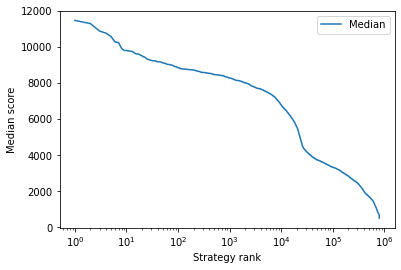

In [14]:
# start at highest medians
# x axis logarithmic (start indexing at 1)
data.plot(y="Median", logx=True)
plt.xlabel("Strategy rank")
plt.ylabel("Median score")
plt.show()

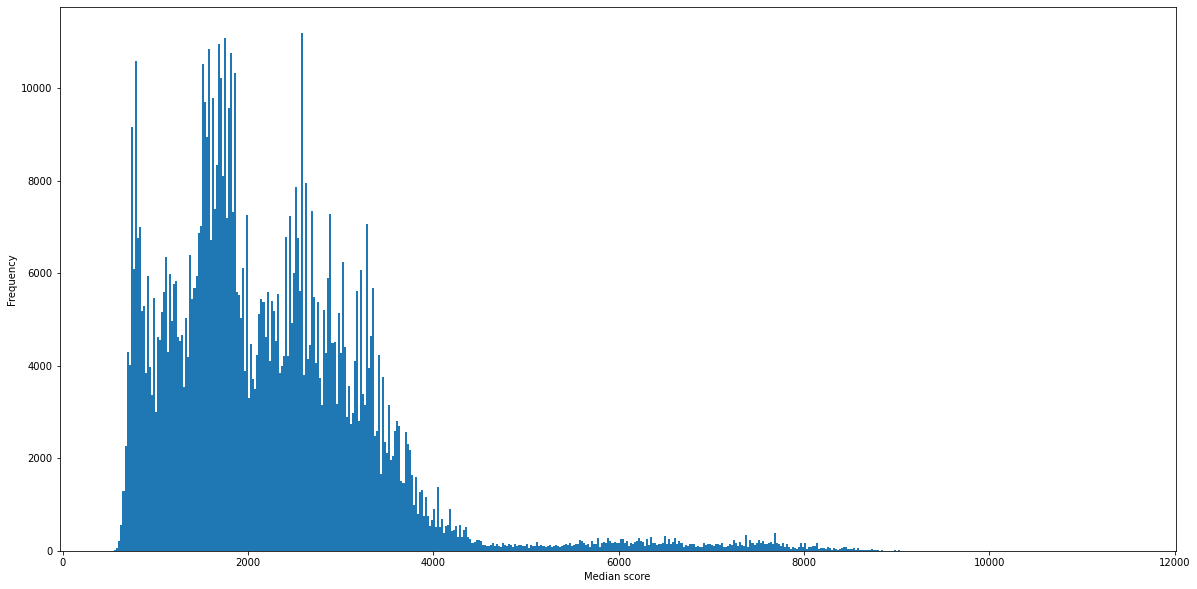

In [15]:
data['Median'].plot.hist(figsize=(20, 10), bins=500)
plt.xlabel("Median score")
plt.show()